# Titanic Tutorial by YouhanLee - 1st Try

ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌÉÄÏù¥ÌÉÄÎãâÏóê ÏäπÏÑ†Ìïú ÏÇ¨ÎûåÎì§Ïùò Ïã†ÏÉÅ Ï†ïÎ≥¥Î•º ÌôúÏöîÌïòÏó¨ ÏäπÏÑ±Ìïú ÏÇ¨ÎûåÎì§Ïùò ÏÉùÏ°¥ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÎäî Í≤ÉÏù¥ Î™©Ï†ÅÏù¥Îã§.

`matplotlib` `seaborn` `plotly` `pandas` `numpy` `sklearn`

* **Îç∞Ïù¥ÌÑ∞ÏÖã ÌôïÏù∏** : null data Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
* **EDA** : Ïó¨Îü¨ ÌîºÏ≤òÎì§Ïùò Í∞úÎ≥Ñ Î∂ÑÏÑù Î∞è ÌîºÏ≤òÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏. Ïù¥ Îïå ÏãúÍ∞ÅÌôî Ìà¥ÏùÑ ÏÇ¨Ïö©
* **Feature Engineering** : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ ÌîºÏ≤òÎì§ÏùÑ Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Í≥ºÏ†ï.    
  * *one-hot-encoding*, *class Î∂ÑÎ•ò*, *Î¨∏ÏûêÏó¥ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨* Îì±Ïù¥ Ïó¨Í∏∞ÏÑú Ïù¥Î£®Ïñ¥Ïßê.
* **Model ÏÑ§Í≥Ñ** : `sklearn`, `pytorch`, `tensorflow` Îì±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÏÑ§Í≥Ñ.
* **Model ÌïôÏäµ Î∞è ÏòàÏ∏°** : train Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† test Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°.
* **Model ÌèâÍ∞Ä** : ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌåêÎã®.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# msno library
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Îç∞Ïù¥ÌÑ∞ÏÖã ÌôïÏù∏

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Ïö∞Î¶¨Í∞Ä Îã§Î£®Í≥†Ïûê ÌïòÎäî ÌîºÏ≤òÎäî `Pclass`, `Age`, `SibSp`, `Parch`. `Fare` Îì±Ïù¥ ÏûàÍ≥†, ÏòàÏ∏°ÌïòÎ†§Îäî target ÌîºÏ≤òÎäî `Survived`Ïù¥Îã§.
* `Pclass` : Ìã∞ÏºìÏùò ÌÅ¥ÎûòÏä§ (Ïù¥ÏΩîÎÖ∏ÎØ∏, ÌçºÏä§Ìä∏ Í∞ôÏùÄ Í≤É)
* `SibSp` : Ìï®Íªò ÌÉëÏäπÌïú ÌòïÏ†úÏôÄ Î∞∞Ïö∞ÏûêÏùò Ïàò
* `Parch` : Ìï®Íªò ÌÉëÏäπÌïú Î∂ÄÎ™®ÏôÄ ÏïÑÏù¥Ïùò Ïàò
* `Embarked` : ÌÉëÏäπÌïú Ìï≠Íµ¨
* `Cabin` : Í∞ùÏã§ Î≤àÌò∏

In [4]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

`describe()`Î•º ÌÜµÌï¥ Í∞Å ÌîºÏ≤òÏóê ÎåÄÌïú ÌÜµÍ≥ÑÏπòÎ•º Ïïå Ïàò ÏûàÎã§. **PassengerId**Ïùò Í∞úÏàòÎäî 819Í∞úÏù¥ÎØÄÎ°ú, ÎßåÏïΩ Î™®Îì† ÌîºÏ≤òÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Í∞ñÍ≥† ÏûàÎã§Î©¥ ÎòëÍ∞ôÏù¥ 819Í∞úÏó¨Ïïº ÌïúÎã§. ÌïòÏßÄÎßå, **Age**Î•º Î≥¥Î©¥ 714Í∞úÎ°ú Í≤∞Ï∏°Ïπò(missing value)Í∞Ä ÏûàÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

### 1.1. Null Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [6]:
# train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïòÏó¨ Í∞Å ÌîºÏ≤òÎßàÎã§ null dataÏùò ÎπÑÏú®ÏùÑ Íµ¨Ìï®
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
# test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïòÏó¨ Í∞Å ÌîºÏ≤òÎßàÎã§ null dataÏùò ÎπÑÏú®ÏùÑ Íµ¨Ìï®
for col in df_test.columns:
    # Í∞Å ÌîºÏ≤òÎßàÎã§ null dataÏùò ÎπÑÏú®ÏùÑ Íµ¨Ìï®
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


trainÍ≥º testÏóêÏÑú Îëò Îã§ `Age`, `Cabin`, `Embarked`ÏóêÏÑú null Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. **MSNO** ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú Í∞Å ÌîºÏ≤òÏóê ÎåÄÌï¥ null Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.     

* **matrix**ÏóêÏÑú Ìù∞ÏÉâ Î∂ÄÎ∂ÑÏù¥ Í≤∞Ï∏°ÏπòÎùºÎäî ÎúªÏù¥Í≥†, ÏòÜÏóê ÏûàÎäî Í≤ÉÏùÄ Ïä§ÌååÌÅ¨ÎùºÏù∏(sparkline)ÏúºÎ°ú Í∞Å ÌñâÏùò Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
* **bar**Îäî Í∞Å Ïó¥Ïùò ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏñºÎßàÎÇò Ï°¥Ïû¨ÌïòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ∏Îã§.

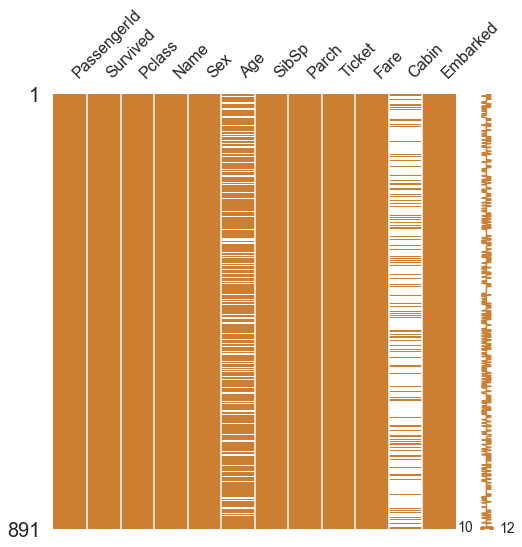

In [13]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

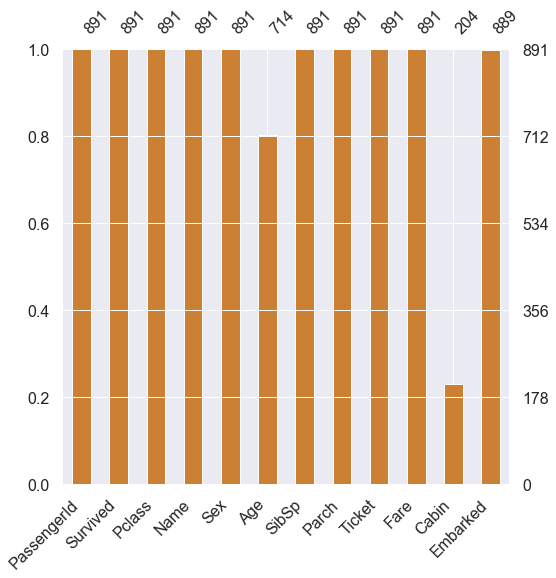

In [15]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

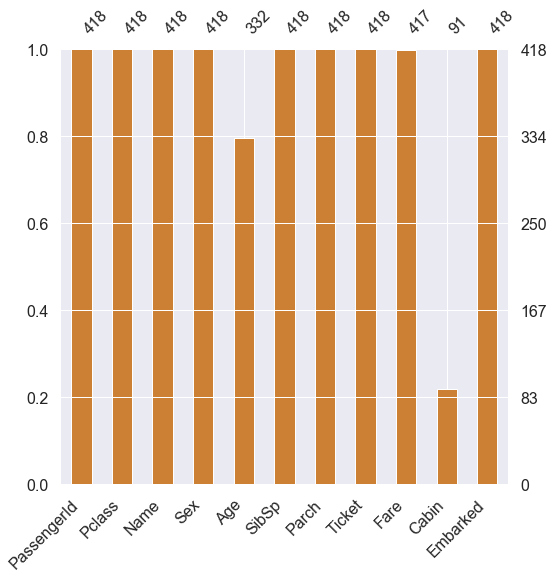

In [16]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2. Target Label ÌôïÏù∏

Target LabelÏù¥ Ïñ¥Îñ§ Î∂ÑÌè¨(distribution)ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏ÏùÑ Ìï¥Ïïº ÌïúÎã§. Ï¶â, ÌÅ¥ÎûòÏä§ Î≥Ñ Ïó¨Í∏∞ÏÑúÎäî 1Í≥º 0Ïùò Î∂ÑÌè¨Ïóê Îî∞ÎùºÏÑú Î™®Îç∏Ïùò ÌèâÍ∞Ä Î∞©Î≤ïÏù¥ Îã¨ÎùºÏßà Ïàò ÏûàÎã§.

Ïó¨Í∏∞ÏÑú Ïì¥ `subplots`Îäî Ìïú figureÏóê Ïó¨Îü¨ Í∞úÏùò plotÏùÑ Í∑∏Î¶¨Í≥† Ïã∂ÏùÑ Îïå ÏÇ¨Ïö©ÌïúÎã§.

> **subplots(self, nrows=1, ncols=1, *)**
> - nrows : ÌñâÏùò Í∞úÏàò
> - ncols : Ïó¥Ïùò Í∞úÏàò
> - figsize : figureÏùò ÏÇ¨Ïù¥Ï¶à

`pie`Îäî pie Ï∞®Ìä∏Î•º Í∑∏Î¶¥ Ïàò ÏûàÎäî Ìï®ÏàòÏù¥Îã§.

> **pie(self, x, explode=None, autopct=None, shadow=False, *)**
> - explode : pie Ï°∞Í∞ÅÏù¥ ÎèåÏ∂úÎêòÎäî ÌÅ¨Í∏∞. Ïó¨Í∏∞ÏÑúÎäî 2Î∞òÏ©® ÌååÏù¥Îßå ÎèåÏ∂ú.
> - autopct : pie Ï°∞Í∞ÅÏùò Ï†ÑÏ≤¥ ÎåÄÎπÑ Î∞±Î∂ÑÏú®. ÏÜåÏàòÏ†ê Ï≤´Ïß∏ÏûêÎ¶¨ÍπåÏßÄ ÌëúÌòÑ.
> - ax : ÎåÄÏÉÅ axe Í∞ùÏ≤¥
> - shadow : Í∑∏Î¶ºÏûê Ìö®Í≥º Ïó¨Î∂Ä

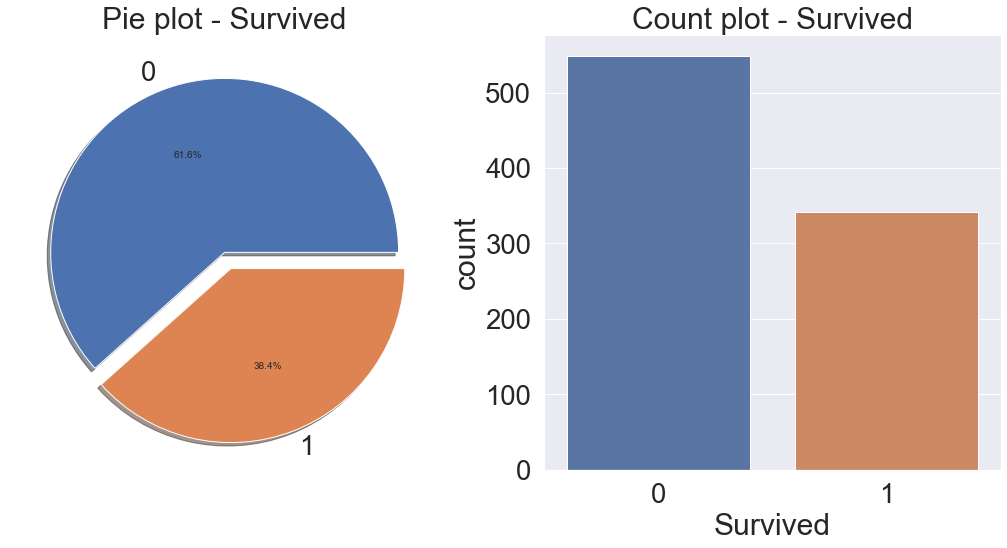

In [21]:
# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú axe Í∞ùÏ≤¥ ÏÉùÏÑ±
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1. Survived ÌîºÏ≤òÎßå Îêú SeriesÎ•º Ï∂îÏ∂ú
# 2. Í∞Å valueÎ≥Ñ dataÏùò Í∞úÏàòÎ•º Íµ¨ÌïòÏó¨ SeriesÎ°ú Î∞òÌôò
# 3. Í∑∏Í≤ÉÏùÑ pie Ï∞®Ìä∏Î°ú ÎÇòÌÉÄÎÉÑ
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# SurvivedÏóê Í∞Å valueÎ≥Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏñºÎßàÎÇò ÏûàÎäîÏßÄ ÌëúÏãú
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

ÏãúÍ∞ÅÌôîÎêú Í≤ÉÏùÑ Î≥¥Î©¥ ÏïΩ **38.4%**Îßå ÏÇ¥ÏïÑÎÇ®ÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. ÎòêÌïú target valueÍ∞Ä Ìïú Ï™ΩÏúºÎ°ú Ïè†Î†§ÏûàÏßÄ ÏïäÍ≥† ÍΩ§ Í∑†ÏùºÌïòÍ≤å(balanced) ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

Í∑∏Îüº Í∑†ÏùºÌïòÏßÄ ÏïäÏùÄÍ≤å Ïôú Î¨∏Ï†úÏùºÍπå? ÎßåÏïΩ 100 Ï§ëÏóê 1Ïù¥ 99Í∞ú, 0Ïù¥ 1Í∞úÎùºÍ≥† ÌïòÎ©¥, Î™®Îç∏ÏùÑ Ïñ¥Îñ§ inputÏù¥ Îì§Ïñ¥Ïò§Îì† 1Î°ú ÏòàÏ∏°ÏùÑ ÌïòÍ≤å ÎêòÎ©¥ Ï†ïÌôïÎèÑÎäî 99%Í∞Ä ÎÇòÏò®Îã§. Í∑∏ÎûòÏÑú Ïù¥Îü¥ Í≤ΩÏö∞ Îã§Î•∏ Î∞©Î≤ïÏùÑ Ïì∞Í±∞ÎÇò ÌèâÍ∞ÄÏßÄÌëúÎ•º Î∞îÍæ∏Ïñ¥Ïïº ÌïúÎã§.

## 2. Exploratory Data Analysis (EDA)

Í∞Å ÌîºÏ≤òÏóê Ìï¥ÎãπÌïòÎäî Î≥∏Í≤©Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Îã®Í≥Ñ. ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù∏ `matplotlib`, `seaborn`, `plotly` Îì±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÑÏÑùÌïúÎã§.

> `üí° TIPS`   
> ÌäπÏ†ï Î™©Ï†ÅÏóê ÎßûÎäî ÏÜåÏä§ÏΩîÎìúÎ•º Ï†ïÎ¶¨Ìï¥ÎëêÎ©¥ ÎÇòÏ§ëÏóê Ï∞∏Í≥†Ïö©ÏúºÎ°ú Ìé∏ÌïòÎã§!

### 2.1. Pclass

`Pclass`Îäî **Ïπ¥ÌÖåÍ≥†Î¶¨Ïù¥Î©¥ÏÑú, ÏàúÏÑúÍ∞Ä ÏûàÎäî** ÏÑúÏàòÌòï(ordinal) Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. Ïù¥Ï†ú `Pclass`ÏôÄ targetÏù∏ `Survived`ÏôÄÏùò Í¥ÄÍ≥ÑÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê.
1. PclassÏôÄ SurvivedÎ•º Í∞ÄÏ†∏ÏôÄ `groupby`Î•º ÏÇ¨Ïö©ÌïòÏó¨ PclassÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î¨∂ÎäîÎã§.
2. Í∑∏Îü¨Î©¥ PclassÎßàÎã§ 0Í≥º 1Ïù¥ countÍ∞Ä ÎêòÎ©¥ÏÑú Í∞Å Pclass Î≥ÑÎ°ú ÏÉùÏ°¥ÏûêÎ•º Ïïå Ïàò ÏûàÎã§.

Ïó¨Í∏∞ÏÑú `groupby` Ìï®ÏàòÎ•º Ïû†Ïãú ÏÇ¥Ìé¥Î≥¥Ïûê. `groupby`Îäî Îç∞Ïù¥ÌÑ∞Î•º Í∑∏Î£π Î≥ÑÎ°ú Î∂ÑÎ•òÌï† Îïå ÏÇ¨Ïö©ÌïúÎã§. Ïó¨Í∏∞ÏÑúÎäî PclassÏùò valueÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îã§Î•∏ ÌîºÏ≤ò Í∑∏Î£π Î≥ÑÎ°ú Î∂ÑÎ•òÎ•º ÌïúÎã§. Í∑∏ ÌõÑ, GroupBy Í∞ùÏ≤¥ Îí§Ïóê `sum`, `mean`, `min` Îì±Í≥º  Í∞ôÏùÄ Í∑∏Î£π Ïó∞ÏÇ∞ Î©îÏÑúÎìúÎ•º Î∂ôÏó¨ÏÑú Í∑∏Î£π Î≥ÑÎ°ú Ïó∞ÏÇ∞ÏùÑ Í∞ÄÎä•ÌïòÍ≤å ÌïúÎã§.
> **DataFrame.groupby(by=None, as_index=True)**
> * `by` : Ïñ¥Îñ§ Í∑∏Î£πÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ìï† Í≤ÉÏù∏ÏßÄ
> * `as_index` : Í∏∞Ï§Ä Í∑∏Î£πÏùò valueÎ•º Ïù∏Îç±Ïä§Î°ú ÏßÄÏ†ïÌï† Í≤ÉÏù∏ÏßÄ

In [19]:
# ÏÉùÏ°¥ ÏÇ¨ÎßùÍ≥º ÏÉÅÍ¥ÄÏóÜÏù¥ Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Î™á Î™ÖÏù¥ ÏûàÎäîÏßÄ
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

Survived
Pclass          
1            216
2            184
3            491

In [20]:
# ÏÉùÏ°¥ÏûêÎäî Î™á Î™ÖÏù∏ÏßÄ
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

Survived
Pclass          
1            136
2             87
3            119

Ïù¥ Îïå pandasÏùò **crosstab**ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏúÑÏùò Í≥ºÏ†ïÏùÑ Ï°∞Í∏à Îçî ÏàòÏõîÌïòÍ≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

> **pandas.crosstab(index, columns, margins=False)**
> - index : rowÏóêÏÑú Í∑∏Î£πÌïëÏùÑ Ìï† Series
> - columns : columnÏóêÏÑú Í∑∏Î£πÌïëÏùÑ Ìï† Series
> - margins : Í∞Å rowÏôÄ columnÏùò Ìï©ÏùÑ ÎÇòÌÉÄÎÇºÍ±¥ÏßÄ (subtotal)

Ï∞∏Í≥†Î°ú pandasÏùò stylingÍ≥º Í¥ÄÎ†®Ìï¥ÏÑúÎäî [Ïó¨Í∏∞](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)Î•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî!

In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

 Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú `mean()` Î©îÏÑúÎìúÎ•º Î∂ôÏó¨Ï£ºÎ©¥ Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉùÏ°¥Î•òÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§. class 1Ïùò Í≤ΩÏö∞ ÏÉùÏ°¥Î•†ÏùÄ ÏïΩ **0.63**Ïù¥ ÎêòÎäî Í±∏ Ïïå Ïàò ÏûàÎã§. Ï¶â, **PclassÍ∞Ä Ï¢ãÏùÑ ÏàòÎ°ù ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§.**
 
 > **DataFrame.sort_values(by, ascending=True)**
 > - `by` : Ï†ïÎ†¨ Í∏∞Ï§Ä
 > - `ascending` : Ï†ïÎ†¨ ÏàúÏÑú (ÎÜíÏïÑÏßÄÎäî Ïàú or ÎÇÆÏïÑÏßÄÎäî Ïàú)

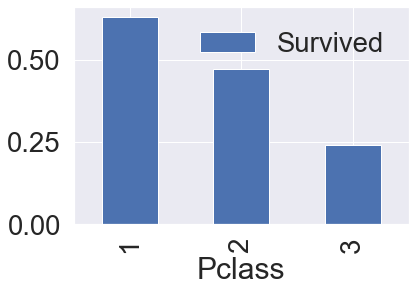

In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar()

seabornÏùò countplotÏúºÎ°ú Ï¢Ä Îçî Î≥¥Í∏∞ ÏâΩÍ≤å Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥Ïûê. Îã§ÏùåÏùÄ ÌäπÏ†ï labelÏóê Îî∞Î•∏ Í∞úÏàòÎ•º ÎÇòÌÉÄÎÇ∏ Í≤ÉÏù¥Îã§. Pclass 1, 2, 3 ÏàúÏúºÎ°ú **63%, 48%, 25%**Î°ú PclassÍ∞Ä ÏÉùÏ°¥Î•†Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÎã§.

> `üí° TIP`    
> pandasÏóêÏÑúÎäî SeriesÎÇò DataframeÏùÑ plotÌï† Ïàò ÏûàÍ≤å Ìï¥ÎÜìÏïòÎã§. Î∞±ÏóîÎìúÎ•º Ïì¥Îã§ÎÇò? ÏïΩÍ∞Ñ tensorflowÏóêÏÑú kerasÍ∞Ä ÎèåÏïÑÍ∞ÄÎäî ÏöîÎü∞ ÎäêÎÇåÏù∏ Í≤É Í∞ôÏùÄÎç∞.. Ï†ïÌôïÌïòÏßÄÎäî ÏïäÎã§. Ïñ¥Ï®åÎì†, Í∏∞Î≥∏Ï†ÅÏúºÎ°ú matplotlibÎ•º ÏÇ¨Ïö©ÌïúÎã§.

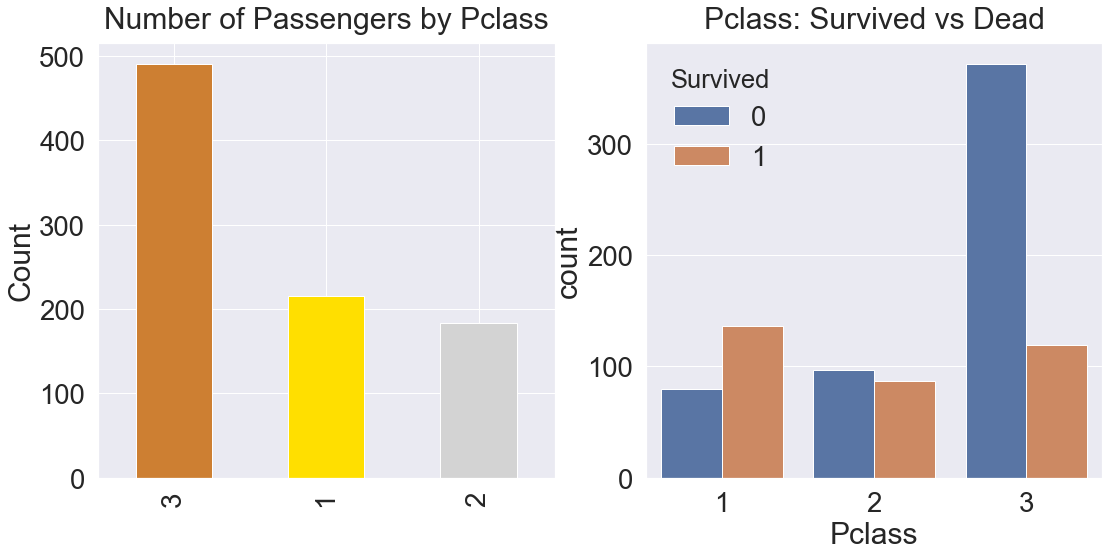

In [25]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ïò§ÏßÅ ÏÉùÏ°¥Ïûê ÏàòÎßå
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò
# hueÎäî Í∞Å ÌÅ¥ÎûòÏä§Î•º Î≠òÎ°ú Íµ¨Î∂ÑÌï†Í±¥ÏßÄ. Ïó¨Í∏∞ÏÑúÎäî ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûêÍ∞Ä Îê®.
# ÏïΩÍ∞Ñ Ï°∞Í±¥Î∂Ä ÌôïÎ•†Ï≤òÎüº Î∞õÏïÑÎì§Ïù¥Î©¥ Îê®. ÏòàÎ•º Îì§Ïñ¥ classÍ∞Ä 1Ïùº ÎïåÏùò ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûêÏàò
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

### 2.2. Sex

Ïù¥Î≤àÏóêÎäî ÏÑ±Î≥ÑÎ°ú ÏÉùÏ°¥Î•†Ïù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê. PclassÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú **groupby**ÏôÄ **seabornÏùò countplot**ÏùÑ Í∞ÄÏßÄÍ≥† ÏãúÍ∞ÅÌôîÌï¥Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

Ïù¥ Îïå **Ïó¨ÏûêÍ∞Ä ÏÉùÏ°¥Î•†Ïù¥ Îçî ÎÜíÏùå**ÏùÑ Ïïå Ïàò ÏûàÎã§.

In [31]:
# Í∞Å ÏÑ±Î≥Ñ ÏÉùÏ°¥Î•†
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Sex             
female  0.742038
male    0.188908

In [32]:
# crosstabÏúºÎ°ú ÎÇòÌÉÄÎÇ∏ Í∞Å ÏÑ±Î≥Ñ ÏÉùÏ°¥ÏûêÏôÄ ÏÇ¨ÎßùÏûê
pd.crosstab(df_train['Sex'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

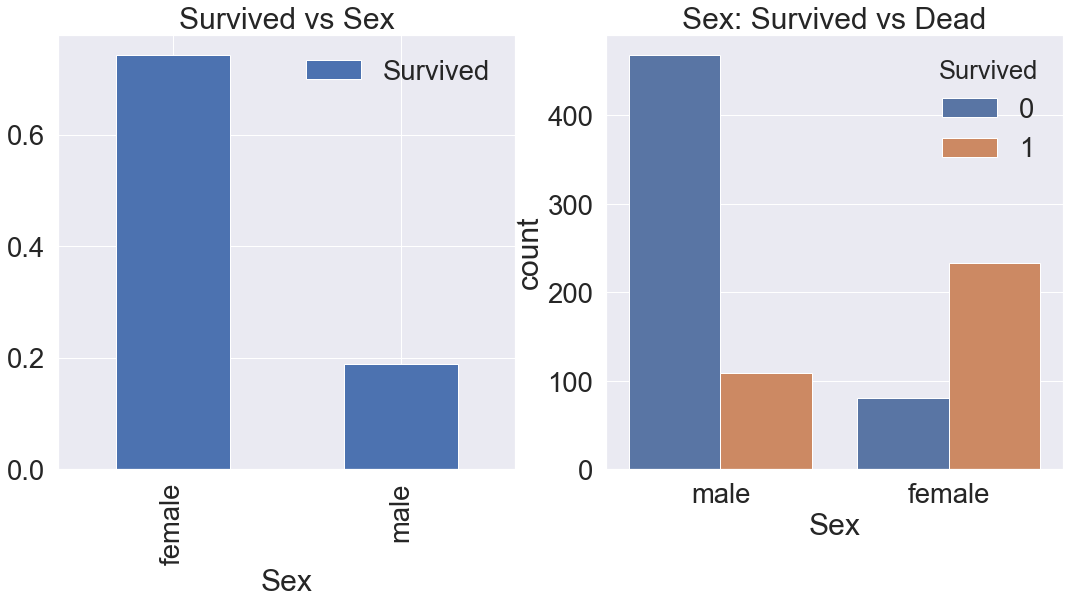

In [29]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Í∞Å ÏÑ±Î≥Ñ ÏÉùÏ°¥Ïûê Ïàò
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# Í∞Å ÏÑ±Î≥Ñ ÏÉùÏ°¥Ïûê/ÏÇ¨ÎßùÏûê Ïàò
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

### 2.3. Both Sex and Pclass

Ïù¥Î≤àÏóêÎäî **SexÏôÄ Pclass ÎëêÍ∞ÄÏßÄÏóê Í¥ÄÌï¥ÏÑú ÏÉùÏ°¥Ïù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ** ÌôïÏù∏Ìï¥Î≥¥Ïûê. Ïù¥ Îïå seabornÏùò `factorplot`ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ ÏÜêÏâΩÍ≤å 3Í∞úÏùò Ï∞®ÏõêÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ ÏàòÍ∞Ä ÏûàÎã§. `y`Ïùò ÌèâÍ∑†Í∞íÏùÑ ÎÇòÌÉÄÎÇ¥ÎäîÎç∞, `hue`Î°ú ÏßÄÏ†ïÎêú ÌîºÏ≤òÏùò Ï¢ÖÎ•òÏàòÎßåÌÅº ÏÑ†Ïù¥ Í∑∏Î†§ÏßÑÎã§. Ïó¨Í∏∞ÏÑúÎäî SexÏù∏Îç∞ SexÎäî ÎÇ®Í≥º Ïó¨ ÎëêÍ∞ÄÏßÄÏù¥ÎØÄÎ°ú ÏÑ†Ïù¥ 2Í∞úÍ∞Ä Í∑∏Î†§ÏßÑÎã§.

> **seaborn.factorplot(x=None, y=None, hue=None, data=None, height=5, aspect=1)**
> - `x`, `y` : xÏ∂ï, yÏ∂ïÏúºÎ°ú ÎÇòÌÉÄÎÇº ÌîºÏ≤òÎì§
> - `hue` : ÏÑ†ÏúºÎ°ú Í∑∏Î¶¥ ÌîºÏ≤ò (Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï ÌîºÏ≤ò)
> - `col` : Í∞Å valueÎ•º columnÏúºÎ°ú ÎÇòÎàå ÌîºÏ≤ò (Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï ÌîºÏ≤ò)
> - `data` : plotÌï† Îç∞Ïù¥ÌÑ∞ÏÖã(dataframe)
> - `height` : figureÏùò ÏÇ¨Ïù¥Ï¶à. ÏòàÏ†ÑÏóêÎäî `size` ÏòÄÏùå.
> - `aspect` : figureÏùò Í∞ÄÎ°úÏÑ∏Î°ú ÎπÑÏú®

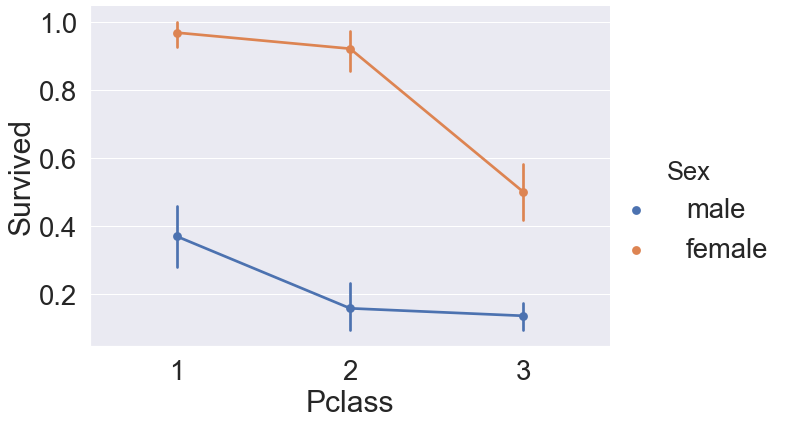

In [37]:
sns.factorplot('Pclass', 'Survived', hue='Sex',
               data=df_train, size=6, aspect=1.5)

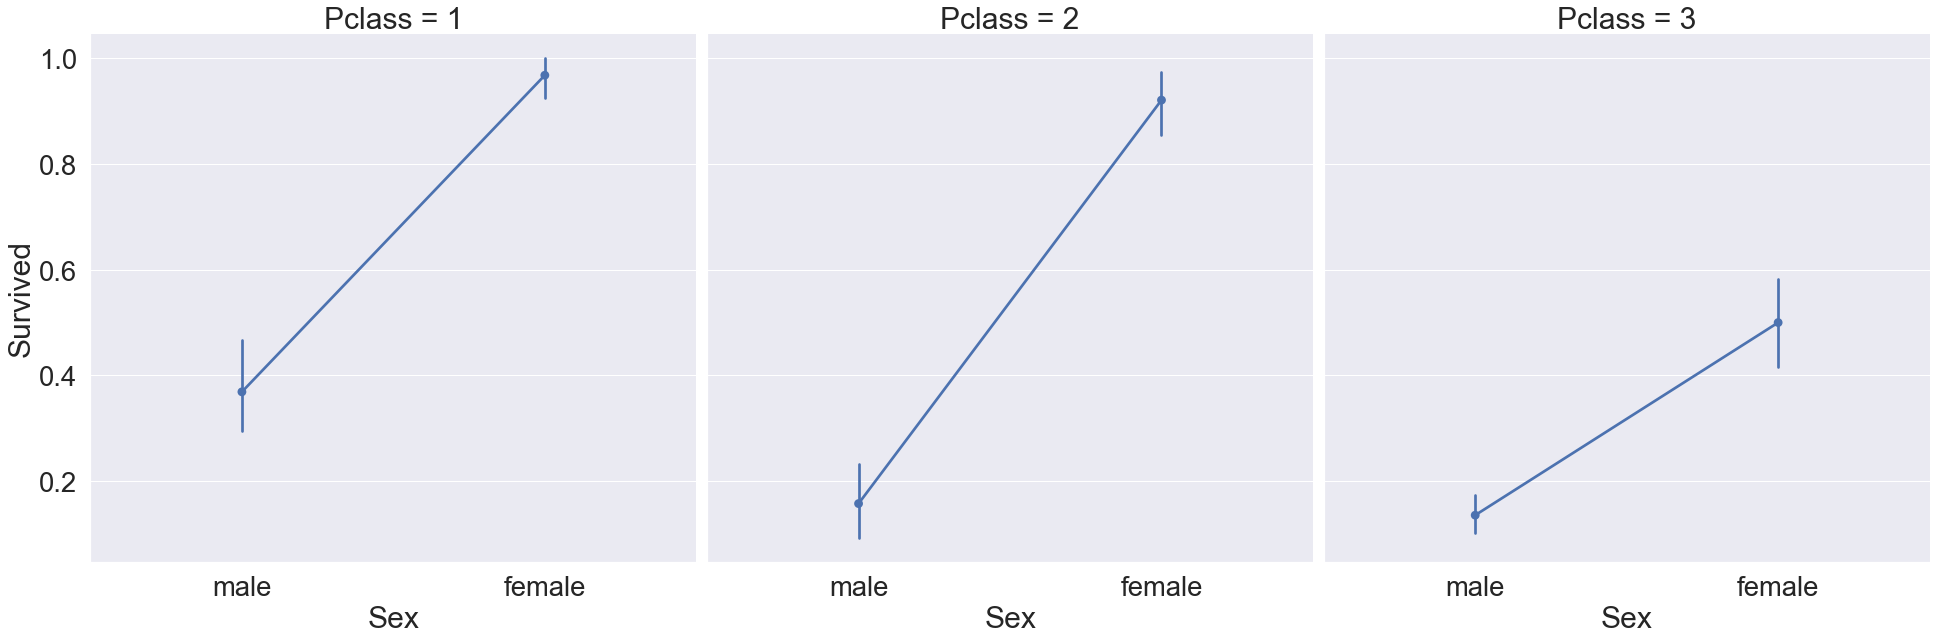

In [38]:
# saturationÏùÄ HSL Ïª¨Îü¨Ïùò S(Ï±ÑÎèÑ)Î∂ÄÎ∂ÑÏùÑ ÎßêÌï®
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, saturation=0.5, size=9, aspect=1)

### 2.4. Age

## References
- [HONG_YP : missingnoÎ•º Ïù¥Ïö©ÌïòÏó¨ Í≤∞Ï∏°ÏπòÎ•º ÏãúÍ∞ÅÌôîÌï¥Î≥¥Í∏∞](https://hong-yp-ml-records.tistory.com/14)    
- [Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ïñ∏Ïä§Ïä§Ïø® : ÎàÑÎùΩÎç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨](https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/)   
- [Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ïñ∏Ïä§Ïä§Ïø® : SeabornÏùÑ ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)    
- [Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ïñ∏Ïä§Ïä§Ïø® : ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ Matplotlib ÏÜåÍ∞ú](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)   
- [Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ïñ∏Ïä§Ïä§Ïø® : Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îç∞Ïù¥ÌÑ∞ Ï°∞Ïûë](https://datascienceschool.net/view-notebook/aa62265f02fc429aa636ef343c3b1fda/)  
- [Matplotlib Tutorial : Pie Chart](https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.html)
- [Ïò•ÏàòÎ≥Ñ : ÌååÏù¥ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞](https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220755238265&proxyReferer=https:%2F%2Fwww.google.com%2F)